In [12]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder

In [13]:
def preprocess_image(image):
    blurred_image = cv2.medianBlur(image, ksize=5)
    gray_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray_image, (64, 64))
    return resized_image

In [14]:
from tensorflow.keras.models import load_model

# Modeli yükle
model_yuklenen = load_model('yuz_tanima_modeli.h5')

In [15]:
import cv2
import numpy as np
from PIL import Image
def resmi_on_isle(path):
    img = cv2.imread(path)
    if img is None:
        return None
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img_resized = cv2.resize(img_gray, (64, 64))
    
    img_normalized = img_resized / 255.0
    # Resmi modelin beklediği forma dönüştür (1, 64, 64, 1)
    img_expanded = np.expand_dims(img_normalized, axis=[0, -1])
    return img_expanded

def resmi_tahmin_et(path, model):
    # Resmi ön işlemden geçir
    processed_img = resmi_on_isle(path)
    if processed_img is None:
        print("Resim yüklenemedi.")
        return
    # Tahmini yap
    prediction = model.predict(processed_img)
    # En yüksek tahmini bul
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class

with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)



1/1 [==============================] - 0s 74ms/step


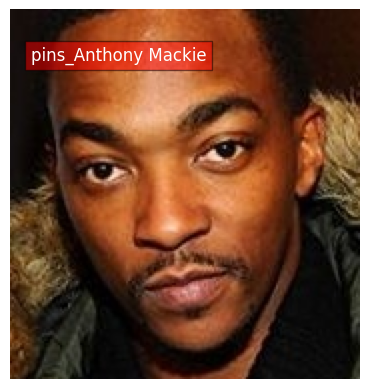

In [16]:
resim_path = "105_classes_pins_dataset\pins_Anthony Mackie\Anthony Mackie8_551.jpg"
image = Image.open(resim_path).convert('RGB')
tahmin = resmi_tahmin_et(resim_path, model_yuklenen)
gercek_sinif = label_encoder.inverse_transform(tahmin)
plt.imshow(image)
plt.axis('off')  

plt.text(10, 25, gercek_sinif[0], color='white', fontsize=12, 
         bbox=dict(facecolor='red', alpha=0.5))

plt.show()